# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In questo esercizio vogliamo calcolare l'integrale sopra definito utilizzando la tecnica dell'importance sampling e la vogliamo paragonare alla tecnica standard, ovvero il campionamento uniforme tra gli estremi di integrazione. Durente le lezioni di teoria abbiamo visto che il modo migliore per calcolare numericamente un dato integrale (ovvero quello che ne minimizza la varianza) è di campionare il dominio di integrazione con una funzione che "assomigli" il più possibile all'integranda.

Ho utilizzato dunque (oltre a quella uniforme) le seguenti due distribuzioni di probabilità:
- $p_1(x) = 2(1-x)$
- $p_2(x) = \frac{3}{2}(1-x^2)$

Nel grafico seguente si può osservare come queste ricalchino le proprità principali della funzione integranda (come la decrescita da 0 a 1 o la concavità).

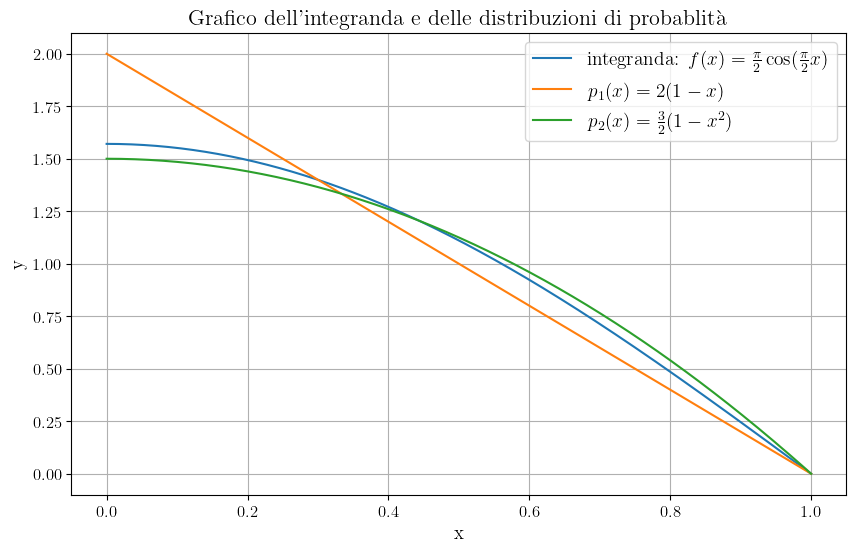

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definisco l'intervallo
x = np.linspace(0, 1, 400)

# Definisco le funzioni
y1 = (np.pi / 2) * np.cos((np.pi / 2) * x)
y2 = 2 * (1 - x)
y3 = (3 / 2) * (1 - x**2)  # Correggo la funzione in modo che sia 1 - (x^2) e non (1-x)^2

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'integranda: $f(x)=\frac{\pi}{2}\cos(\frac{\pi}{2}x)$')
plt.plot(x, y2, label=r'$p_1(x)=2(1-x)$')
plt.plot(x, y3, label=r'$p_2(x)=\frac{3}{2}(1-x^2)$')

# Aggiunta della legenda con dimensioni del carattere maggiori
plt.legend(fontsize=14)

# Aggiunta del titolo e delle etichette degli assi con dimensioni del carattere maggiori
plt.title('Grafico dell\'integranda e delle distribuzioni di probablità', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Configurazione delle dimensioni delle etichette degli assi
plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True)
plt.show()


Chiaramente, mi aspetto che il calcolo dell'integrale con $p_2(x)$ avrà varianza minore rispetto a $p_1(x)$ o all'utilizzo di una distribuzione piatta e dunque mi aspetto una convergenza più rapida.

Per quanto riguarda il campionamento:
- $p_1(x)$ è stata campionata utilizzando il metodo della cumulativa: data $p(x)$ e la sua cumulativa $F(x)$, la variabile $x = F^{-1}(y)$, con y $\in$ [0,1] uniforme, è distribuita secondo $p(x)$. In questo caso la cumulativa è $y = F(x) = 2x - x^2$, che invertita nel giusto intervallo diventa $x = 1-\sqrt{1-y}$.
- $p_2(x)$ invece è stata campionata usando il metodo accept-reject: si estre un punto (x,y) e si valuta se $y < p_2(x)$; in caso affermativo x è il nuovo punto del campionamento, in caso negativo si estrae una nuova coppia.

Nei grafici seguenti si possono osservare i risultati di tale integrale con i diversi campionamenti in funzione del blocco. Ogni blocco è formato da 100 valutazioni dell'integranda.

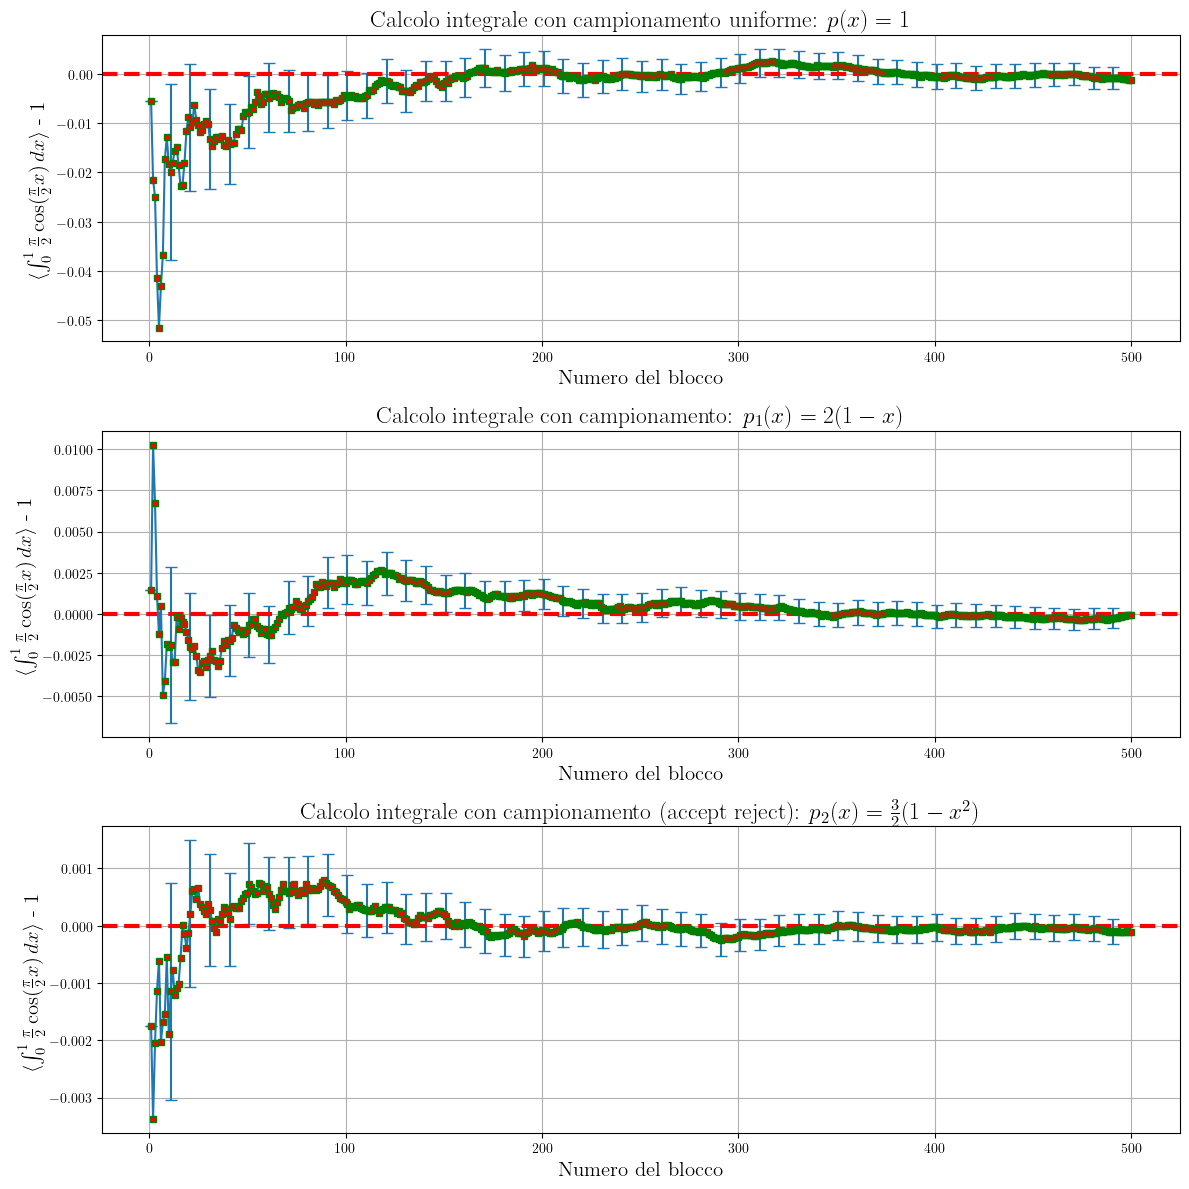

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Impostazioni per utilizzare LaTeX nei testi
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Caricamento dei dati per tutti e tre i grafici
x, y1, error1, y2, error2, y3, error3 = np.loadtxt("esercizio_2.1/risultati.dat", usecols=(0,1,2,3,4,5,6), delimiter=' ', unpack=True)

# Creazione della figura e dei tre subplot
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Grafico 1
axs[0].errorbar(x, y1-1, yerr=error1, errorevery=10, capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
axs[0].set_xlabel('Numero del blocco', fontsize=15)
axs[0].set_ylabel(r'$\langle \int_{0}^{1} \frac{\pi}{2} \cos(\frac{\pi}{2}x) \,dx \rangle$ - 1', fontsize=15)
axs[0].set_title(r'Calcolo integrale con campionamento uniforme: $p(x)=1$', fontsize=17)
axs[0].grid()
axs[0].axhline(y=0, color='red', linestyle='--', linewidth=3)  # Aggiunge l'asse y = 0

# Grafico 2
axs[1].errorbar(x, y2-1, yerr=error2, errorevery=10, capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
axs[1].set_xlabel('Numero del blocco', fontsize=15)
axs[1].set_ylabel(r'$\langle \int_{0}^{1} \frac{\pi}{2} \cos(\frac{\pi}{2}x) \,dx \rangle$ - 1', fontsize=15)
axs[1].set_title(r'Calcolo integrale con campionamento: $p_1(x)=2(1-x)$', fontsize=17)
axs[1].grid()
axs[1].axhline(y=0, color='red', linestyle='--', linewidth=3)  # Aggiunge l'asse y = 0

# Grafico 3
axs[2].errorbar(x, y3-1, yerr=error3, errorevery=10, capsize=4, marker='s', mfc='red', mec='green', ms=5, mew=1)
axs[2].set_xlabel('Numero del blocco', fontsize=15)
axs[2].set_ylabel(r'$\langle \int_{0}^{1} \frac{\pi}{2} \cos(\frac{\pi}{2}x) \,dx \rangle$ - 1', fontsize=15)
axs[2].set_title(r'Calcolo integrale con campionamento (accept reject): $p_2(x)=\frac{3}{2}(1-x^2)$', fontsize=17)
axs[2].grid()
axs[2].axhline(y=0, color='red', linestyle='--', linewidth=3)  # Aggiunge l'asse y = 0

plt.tight_layout()  # Imposta automaticamente la disposizione dei subplot
plt.show()


Come si nota dai grafici, la convergenza dei tre metodi è diversa: dopo 100 blocchi, la differenza tra il valore calcolato e quello vero è:
- $|I_{unif}-1| \simeq 0.05$ per il camopionamento uniforme;
- $|I_{p_1(x)}-1| \simeq 0.002$ per il camopionamento con $p_1(x)$;
- $|I_{p_2(x)}-1| \simeq 0.0005$ per il camopionamento con $p_2(x)$.

Questo conferma le previsioni iniziali.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Questo esercizio consiste nel simulare un Random Walk in 3 dimensioni nel caso discreto e nel caso continuo. L'obiettivo è osservare quanto vale $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con la sua incertezza statistica al variare della lunghezza del Random Walk. Per farlo ho utilizzato la tecnica della media a blocchi, ovvero a fissata lunghezza, ho costruito $10^7$ RW, li ho divisi in 100 blocchi e da ognuno di questi ho estratto la misura $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. Con questi ho calcolato il valore medio e l'incertezza statistica asssociata.

Ho effettuato questo esercizio in due modi diversi:
- 1) Ho generato tutti i RW in modo che quelli di lunghezza k siano l'evoluzione dei rispettivi cammini di lunghezza k-1; in questo caso dunque il valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ a fissata lunghezza dipende da quelli a lunghezza inferiore.
- 2) Ho generato tutti i RW ogni volta partendo dall'origine; in questo caso dunque il valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ a fissata lungheza non dipende da quelli a lunghezza inferiore.

### 1) RW correlati

Nei grafici seguenti riporto l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funzione della lunghezza del Random Walk; a lezione abbiamo visto che questo processo è di tipo diffusivo e di conseguenza mi aspetto che $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ cresca come una funzione del tipo $k\sqrt{N}$, con $N$ lunghezza del RW. Ho effettuato dunque un fit con $k\sqrt{N}$ dove k è il parametro da determinare. Sotto riporto anche i grafici relativi al rapporto $\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$; la riga rossa rappresenta invece il parametro $k$ determinato dal fit.

Caso discreto: k = 0.99953 ± 0.00001
Caso continuo: k = 0.99972 ± 0.00003


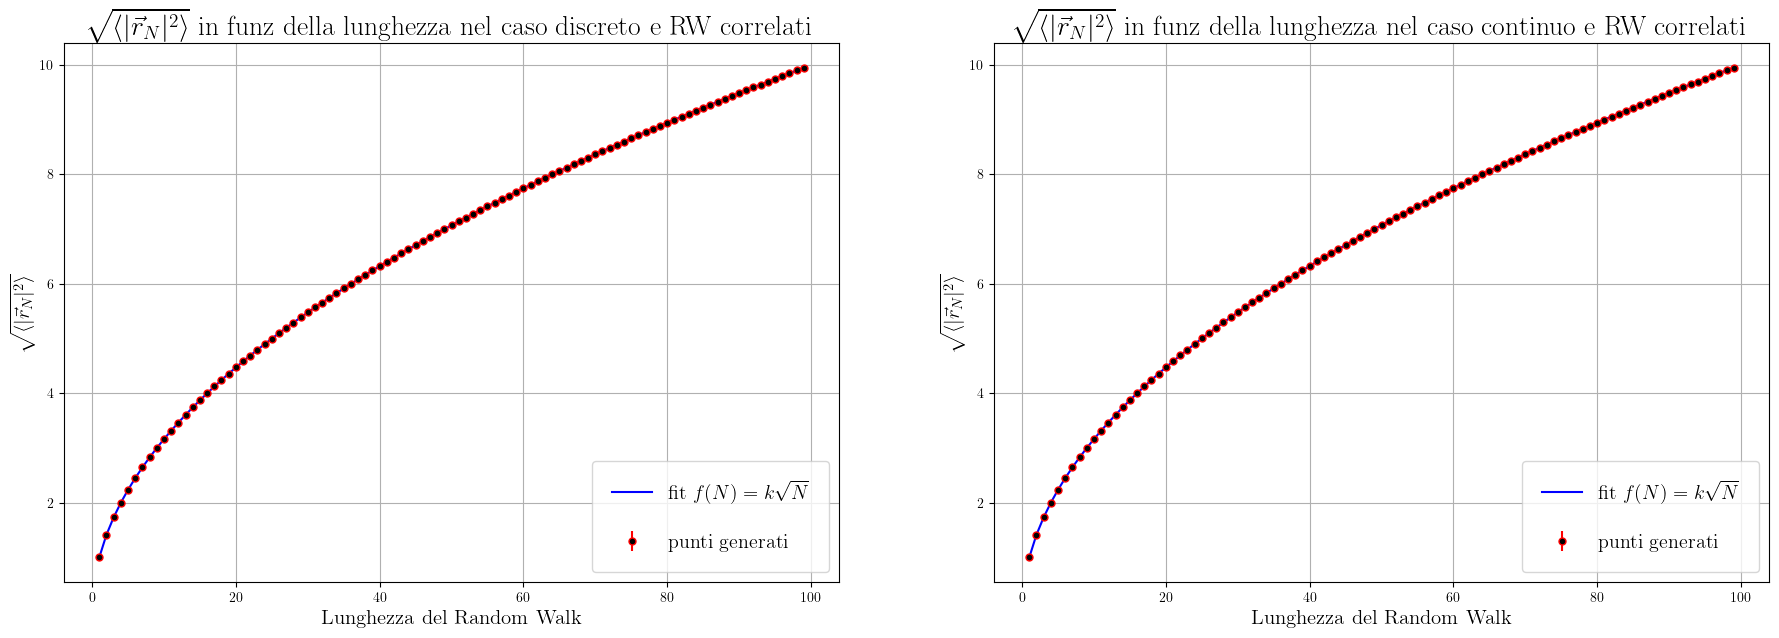

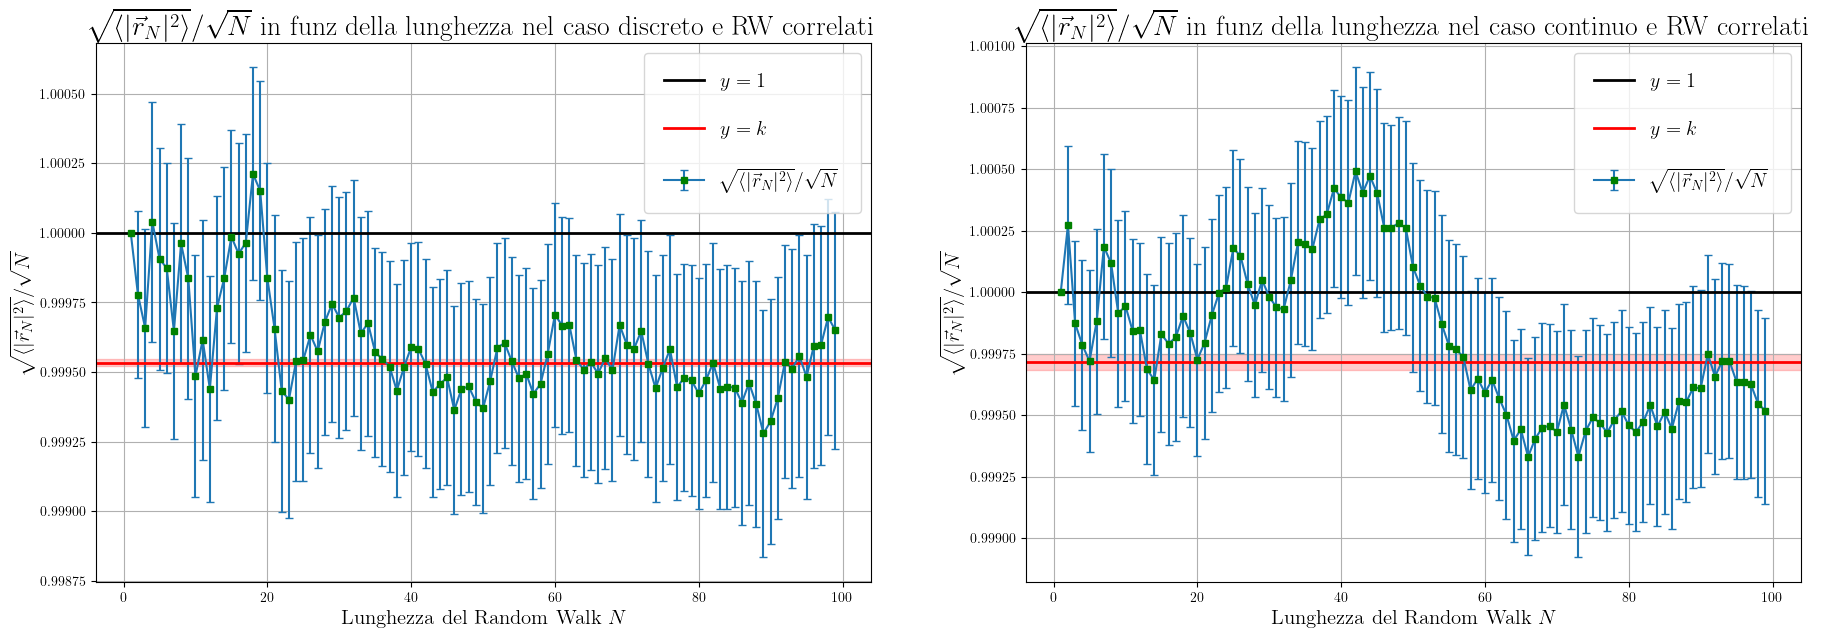

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

def f(x,k):  # defining the fitting function
    return k*np.sqrt(x)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Configurazione per la stampa con tre cifre significative
np.set_printoptions(precision=1, suppress=False)

# Caricamento dei dati per tutti e tre i grafici
x, y1, error1, y2, error2 = np.loadtxt("esercizio_2.2/risultati_corr.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack=True, skiprows=1)
x, y3, error3, y4, error4 = np.loadtxt("esercizio_2.2/risultati_scorr.dat", usecols=(0,1,2,3,4), delimiter=' ', unpack=True, skiprows=1)
cut = -1
xcut = x[x>cut]
y1cut = y1[x>cut]
y2cut = y2[x>cut]
y3cut = y3[x>cut]
y4cut = y4[x>cut]

#################################################
# Random Walk a differente lunghezza correlati
#################################################

# Creazione della figura e dei tre subplot
fig1, axs1 = plt.subplots(1, 2, figsize=(22, 7))
fig2, axs2 = plt.subplots(1, 2, figsize=(22, 7))

# Grafico 1.1
p_opt1, p_cov1 = curve_fit(f, xcut, y1cut)
y1_fit = f(xcut,p_opt1[0])
axs1[0].plot(xcut, y1_fit, color='blue', label = "fit $f(N)= k \sqrt{N}$")
axs1[0].errorbar(x, y1, yerr=error1, fmt='.', ecolor='red', capsize=0, mfc='black', mec='red', ms=10, mew=1, label="punti generati")
axs1[0].set_xlabel('Lunghezza del Random Walk', fontsize=15)
axs1[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=15)
axs1[0].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funz della lunghezza nel caso discreto e RW correlati', fontsize=20)
axs1[0].grid()
axs1[0].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)
k_value = "{:.5f}".format(p_opt1[0])
uncertainty = "{:.5f}".format(np.sqrt(np.diagonal(p_cov1)[0]))
print(f'Caso discreto: k = {k_value} ± {uncertainty}')


# Grafico 1.2
p_opt2, p_cov2 = curve_fit(f, xcut, y2cut)
y2_fit = f(xcut,p_opt2[0])
axs1[1].plot(xcut,y2_fit, color='blue', label = "fit $f(N)= k \sqrt{N}$")
axs1[1].errorbar(x, y2, yerr=error2, fmt='.', ecolor='red', capsize=0, mfc='black', mec='red', ms=10, mew=1, label="punti generati")
axs1[1].set_xlabel('Lunghezza del Random Walk', fontsize=15)
axs1[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=15)
axs1[1].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funz della lunghezza nel caso continuo e RW correlati', fontsize=20)
axs1[1].grid()
axs1[1].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)
k_value = "{:.5f}".format(p_opt2[0])
uncertainty = "{:.5f}".format(np.sqrt(np.diagonal(p_cov2)[0]))
print(f'Caso continuo: k = {k_value} ± {uncertainty}')



# Grafico 2.1
axs2[0].errorbar(x, y1/np.sqrt(x), yerr=error1/np.sqrt(x), errorevery=1, capsize=3, marker='s', mfc='green', mec='green', ms=5, mew=1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}/ \sqrt{N}$")
axs2[0].set_xlabel('Lunghezza del Random Walk $N$', fontsize=15)
axs2[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$', fontsize=15)
axs2[0].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$ in funz della lunghezza nel caso discreto e RW correlati', fontsize=20)
axs2[0].grid()
axs2[0].axhline(y=1, color='black', linestyle='-', linewidth=2, label = '$y = 1$')
axs2[0].axhline(y=p_opt1, color='red', linestyle='-', linewidth=2, label = '$y = k$')
y_min = p_opt1[0] - np.sqrt(np.diagonal(p_cov1)[0])
y_max = p_opt1[0] + np.sqrt(np.diagonal(p_cov1)[0])
shade = mpatches.Rectangle((x[0]-5, y_min), x[-1]+10, y_max-y_min, alpha=0.2, color='red')
axs2[0].add_patch(shade)
axs2[0].legend(loc='upper right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)


# Grafico 2.2
axs2[1].errorbar(x, y2/np.sqrt(x), yerr=error2/np.sqrt(x), errorevery=1, capsize=3, marker='s', mfc='green', mec='green', ms=5, mew=1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}/ \sqrt{N}$")
axs2[1].set_xlabel('Lunghezza del Random Walk $N$', fontsize=15)
axs2[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$', fontsize=15)
axs2[1].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$ in funz della lunghezza nel caso continuo e RW correlati', fontsize=20)
axs2[1].grid()
axs2[1].axhline(y=1, color='black', linestyle='-', linewidth=2, label = "$y = 1$")
axs2[1].axhline(y=p_opt2, color='red', linestyle='-', linewidth=2, label = "$y = k$")
y_min = p_opt2[0] - np.sqrt(np.diagonal(p_cov2)[0])
y_max = p_opt2[0] + np.sqrt(np.diagonal(p_cov2)[0])
shade = mpatches.Rectangle((x[0]-5, y_min), x[-1]+10, y_max-y_min, alpha=0.2, color='red')
axs2[1].add_patch(shade)
axs2[1].legend(loc='upper right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)


Chiaramente nel caso di RW correlati a lunghezze diverse, fare un fit è sbagliato, poichè i punti y del grafico sono dipendenti tra di loro. Mi aspetto dunque che i valori di $k$ calcolati, non siano compatibili con il valore vero per questo processo. I risultati ottenuti sono i seguenti:
- Caso discreto k = 0.99953 ± 0.00001
- Caso contnuo k = 0.99972 ± 0.00003

Come si nota non sono compatibili con 1 che è il valore atteso.

### 2) RW scorrelati

Esattamente come prima riporto i grafici di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funzione della lunghezza $N$: in questo caso ogni punto di tale grafico non dipende dagli altri e dunque il fit del $k\sqrt{N}$ sarà più veritiero. Sotto riporto anche i grafici relativi al rapporto $\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$. La riga rossa rappresenta la retta $y=k$.

Caso discreto: k = 0.99996 ± 0.00005
Caso continuo: k = 1.00000 ± 0.00004


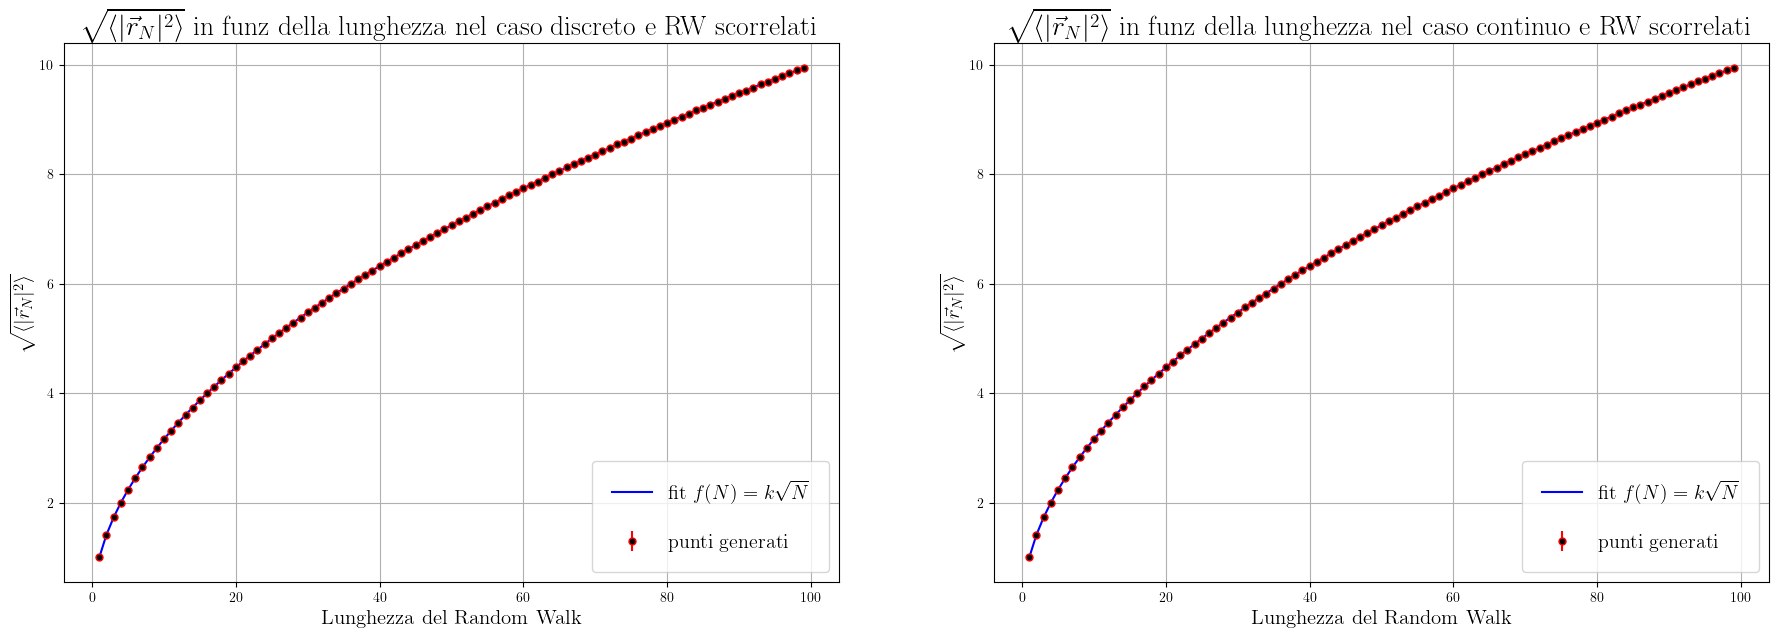

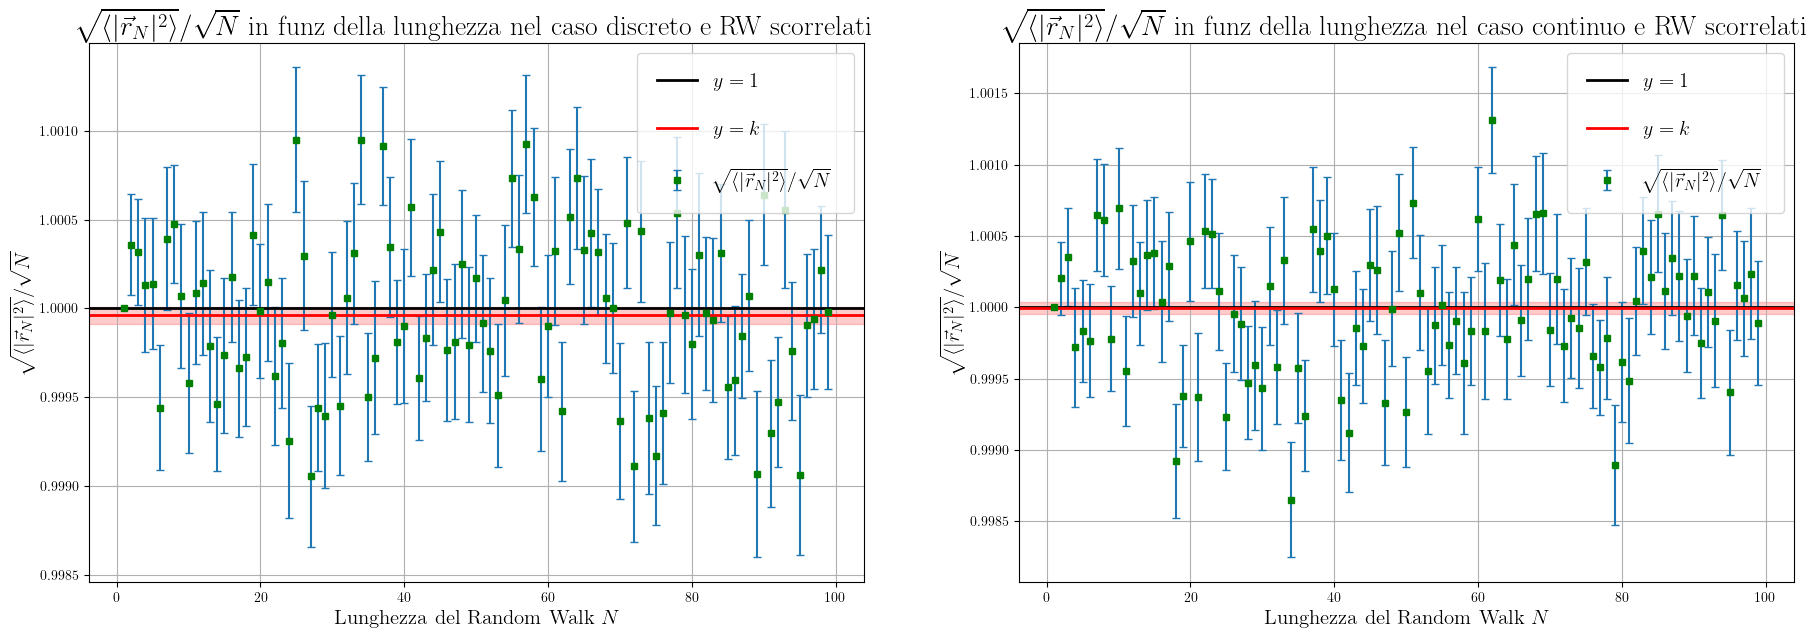

In [60]:
#####################################################
# Random Walk a differente lunghezza non correlati
#####################################################


# Creazione della figura e dei tre subplot
fig1, axs1 = plt.subplots(1, 2, figsize=(22, 7))
fig2, axs2 = plt.subplots(1, 2, figsize=(22, 7))

# Grafico 1.1
p_opt1, p_cov1 = curve_fit(f, xcut, y3cut)
y1_fit = f(xcut,p_opt1[0])
axs1[0].plot(xcut, y1_fit, color='blue', label = "fit $f(N)= k \sqrt{N}$")
axs1[0].errorbar(x, y3, yerr=error3, fmt='.', ecolor='red', capsize=0, mfc='black', mec='red', ms=10, mew=1, label="punti generati")
axs1[0].set_xlabel('Lunghezza del Random Walk', fontsize=15)
axs1[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=15)
axs1[0].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funz della lunghezza nel caso discreto e RW scorrelati', fontsize=20)
axs1[0].grid()
axs1[0].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)
k_value = "{:.5f}".format(p_opt1[0])
uncertainty = "{:.5f}".format(np.sqrt(np.diagonal(p_cov1)[0]))
print(f'Caso discreto: k = {k_value} ± {uncertainty}')


# Grafico 1.2
p_opt2, p_cov2 = curve_fit(f, xcut, y4cut)
y2_fit = f(xcut,p_opt2[0])
axs1[1].plot(xcut,y2_fit, color='blue', label = "fit $f(N)= k \sqrt{N}$")
axs1[1].errorbar(x, y4, yerr=error4, fmt='.', ecolor='red', capsize=0, mfc='black', mec='red', ms=10, mew=1, label="punti generati")
axs1[1].set_xlabel('Lunghezza del Random Walk', fontsize=15)
axs1[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$', fontsize=15)
axs1[1].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funz della lunghezza nel caso continuo e RW scorrelati', fontsize=20)
axs1[1].grid()
axs1[1].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)
k_value = "{:.5f}".format(p_opt2[0])
uncertainty = "{:.5f}".format(np.sqrt(np.diagonal(p_cov2)[0]))
print(f'Caso continuo: k = {k_value} ± {uncertainty}')



# Grafico 2.1
axs2[0].errorbar(x, y3/np.sqrt(x), yerr=error3/np.sqrt(x), errorevery=1, capsize=3, fmt='s', mfc='green', mec='green', ms=5, mew=1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}/ \sqrt{N}$")
axs2[0].set_xlabel('Lunghezza del Random Walk $N$', fontsize=15)
axs2[0].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$', fontsize=15)
axs2[0].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$ in funz della lunghezza nel caso discreto e RW scorrelati', fontsize=20)
axs2[0].grid()
axs2[0].axhline(y=1, color='black', linestyle='-', linewidth=2, label = '$y = 1$')
axs2[0].axhline(y=p_opt1, color='red', linestyle='-', linewidth=2, label = '$y = k$')
y_min = p_opt1[0] - np.sqrt(np.diagonal(p_cov1)[0])
y_max = p_opt1[0] + np.sqrt(np.diagonal(p_cov1)[0])
shade = mpatches.Rectangle((x[0]-5, y_min), x[-1]+10, y_max-y_min, alpha=0.2, color='red')
axs2[0].add_patch(shade)
axs2[0].legend(loc='upper right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)


# Grafico 2.2
axs2[1].errorbar(x, y4/np.sqrt(x), yerr=error4/np.sqrt(x), errorevery=1, capsize=3, fmt='s', mfc='green', mec='green', ms=5, mew=1, label = r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}/ \sqrt{N}$")
axs2[1].set_xlabel('Lunghezza del Random Walk $N$', fontsize=15)
axs2[1].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$', fontsize=15)
axs2[1].set_title(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}/\sqrt{N}$ in funz della lunghezza nel caso continuo e RW scorrelati', fontsize=20)
axs2[1].grid()
axs2[1].axhline(y=1, color='black', linestyle='-', linewidth=2, label = "$y = 1$")
axs2[1].axhline(y=p_opt2, color='red', linestyle='-', linewidth=2, label = "$y = k$")
y_min = p_opt2[0] - np.sqrt(np.diagonal(p_cov2)[0])
y_max = p_opt2[0] + np.sqrt(np.diagonal(p_cov2)[0])
shade = mpatches.Rectangle((x[0]-5, y_min), x[-1]+10, y_max-y_min, alpha=0.2, color='red')
axs2[1].add_patch(shade)
axs2[1].legend(loc='upper right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)


In questo caso i valori di k risultano essere:
- Caso discreto: k = 0.99996 ± 0.00005
- Caso continuo: k = 1.00000 ± 0.00004

Come si nota adesso entrambi i risultati sono compatibili con 1.